In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

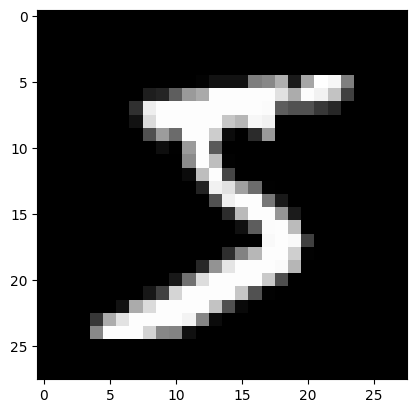

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

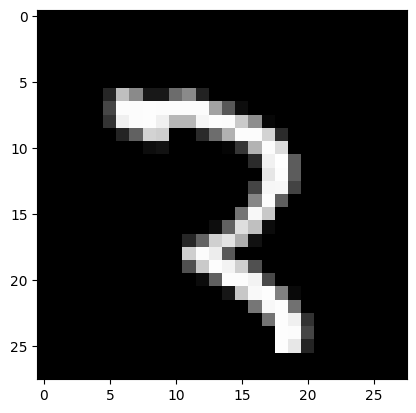

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5),  activation='relu')),
model.add(layers.MaxPool2D(pool_size=(2, 2))),
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')),
model.add(layers.MaxPool2D(pool_size=(2, 2))),
model.add(layers.Flatten()),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(10, activation='softmax'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 64)                2

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 36s 37ms/step - loss: 0.2355 - accuracy: 0.9283 - val_loss: 0.0666 - val_accuracy: 0.9787
Epoch 2/5
938/938 [==============================] - 35s 38ms/step - loss: 0.0686 - accuracy: 0.9790 - val_loss: 0.0409 - val_accuracy: 0.9880
Epoch 3/5
938/938 [==============================] - 36s 39ms/step - loss: 0.0501 - accuracy: 0.9846 - val_loss: 0.0332 - val_accuracy: 0.9888
Epoch 4/5
938/938 [==============================] - 35s 37ms/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0342 - val_accuracy: 0.9899
Epoch 5/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0320 - val_accuracy: 0.9889


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.235539,0.928300,0.066633,0.9787
1,0.068576,0.979000,0.040865,0.9880
2,0.050090,0.984583,0.033183,0.9888
3,0.038462,0.988300,0.034157,0.9899
4,0.032445,0.989933,0.032010,0.9889


Developed by :KANISHKAR M 
Reg No:212222240044


<Axes: >

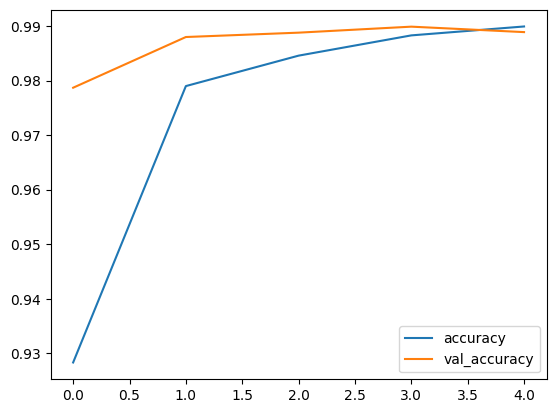

In [27]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
metrics[['accuracy','val_accuracy']].plot()

Developed by :KANISHKAR M 
Reg No:212222240044


<Axes: >

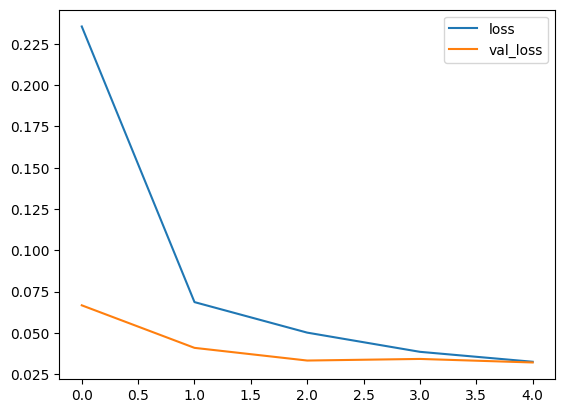

In [28]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 6ms/step


In [30]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
print(confusion_matrix(y_test,x_test_predictions))

Developed by :KANISHKAR M 
Reg No:212222240044
[[ 972    0    0    1    0    0    3    3    1    0]
 [   1 1131    1    1    0    0    0    1    0    0]
 [   0    1 1025    0    0    0    0    4    2    0]
 [   0    0    2 1001    0    2    0    4    1    0]
 [   0    0    2    0  959    0    4    3    1   13]
 [   1    0    1    8    0  878    1    3    0    0]
 [   3    2    0    0    1    2  949    0    1    0]
 [   0    0    3    0    0    0    0 1023    1    1]
 [   3    0    4    2    0    1    0    3  956    5]
 [   0    0    4    0    1    2    0    6    1  995]]


In [31]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
print(classification_report(y_test,x_test_predictions))

Developed by :KANISHKAR M 
Reg No:212222240044
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [32]:
img = image.load_img('/content/mnist1.png')

In [33]:
type(img)

PIL.Image.Image

In [39]:
img = image.load_img('/content/mnist1.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [40]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 41ms/step


In [41]:
print(x_single_prediction)

[3]


Developed by :KANISHKAR M 
Reg No:212222240044


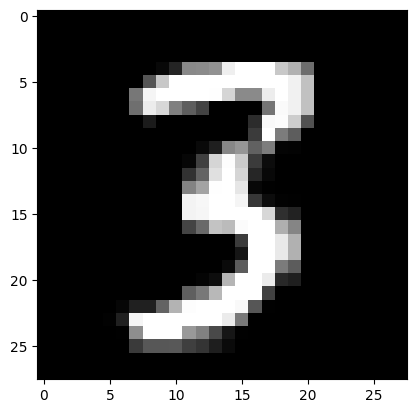

In [43]:
print("Developed by :KANISHKAR M ")
print("Reg No:212222240044")
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')